In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#loading consum electronic data
df_consum_elec = pd.read_csv("/content/gdrive/My Drive/ConsumerElectronics.csv")
df_consum_elec.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [4]:
df_consum_elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null object
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null float64
order_item_id                      1648824 non-null float64
gmv                                1648824 non-null object
units                              1648824 non-null int64
deliverybdays                      1648824 non-null object
deliverycdays                      1648824 non-null object
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1648824 non-null object
pincode                            1648824 non-null object
product_analytic_super_category    1648824 non-null object
prod

In [0]:
#chaning datatypes
df_consum_elec["order_id"] = df_consum_elec.order_id.astype(str)
df_consum_elec["order_item_id"] = df_consum_elec.order_item_id.astype(str)
df_consum_elec['gmv'] = pd.to_numeric(df_consum_elec['gmv'],errors='coerce')
df_consum_elec["order_date"] = df_consum_elec.order_date.astype(str)

In [0]:
#removing time from order_data
split = df_consum_elec["order_date"].str.split(" ", n =1 , expand = True)
df_consum_elec["order_date_split"] = split[0]
df_consum_elec["order_time_split"] = split[1]

In [0]:
#dropping unwanted columns
df_consum_elec.drop(columns = ["order_date","deliverybdays","deliverycdays","cust_id","pincode"],inplace = True)

In [0]:
#dropping duplicate order_item_id
df_consum_elec =  df_consum_elec.drop_duplicates(subset=["order_id","order_item_id"],keep ="first")

In [9]:
df_consum_elec.shape

(1508710, 17)

In [0]:
df_consum_elec.dropna(inplace=True)
df_consum_elec["order_date_split"] = pd.to_datetime(df_consum_elec["order_date_split"])

In [0]:
df_climate = pd.read_excel("/content/gdrive/My Drive/ONTARIO-2015.xlsx")
df_climate["Date/Time"] = pd.to_datetime(df_climate["Date/Time"])

In [0]:
dfconsum_clima_grp = df_consum_elec.merge(df_climate,"left",left_on = "order_date_split",right_on="Date/Time")

In [13]:
dfconsum_clima_grp

,fsn_id,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_split,order_time_split,Date/Time,Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,ACCCX3S58G7B5F6P,2015,10,3419300926147000.0,3419300926147000.0,6400.0,1,COD,5,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17,15:11:54,2015-10-17,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,ACCCX3S58G7B5F6P,2015,10,1420830839915200.0,1420830839915200.0,6900.0,1,COD,7,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19,10:07:22,2015-10-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACCCX3S5AHMF55FV,2015,10,2421912925714800.0,2421912925714800.0,1990.0,1,COD,10,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20,15:45:56,2015-10-20,17.3,0.7,0.0,0.0,0.0,0.0,0.0
3,ACCCX3S5AHMF55FV,2015,10,4416592101738400.0,4416592101738400.0,1690.0,1,Prepaid,4,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14,12:05:15,2015-10-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACCCX3S5AHMF55FV,2015,10,4419525153426400.0,4419525153426400.0,1618.0,1,Prepaid,6,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17,21:25:03,2015-10-17,NaN,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504755,VPLEYAP3ZYYUVESU,2015,9,4402170060025800.0,4402170060025800.0,2200.0,1,COD,7,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-27,19:20:31,2015-09-27,20.0,0.0,2.0,0.0,0.0,0.0,0.0
1504756,VPLEYAP3ZYYUVESU,2015,9,1402393217090200.0,1402393217090200.0,2098.0,1,COD,10,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-28,01:32:58,2015-09-28,22.8,0.0,4.8,0.0,0.0,0.0,0.0
1504757,VPLEYAP3ZYYUVESU,2015,9,4403459511294400.0,4403459511294400.0,2098.0,1,COD,5,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-29,07:07:57,2015-09-29,19.8,0.0,1.8,9.8,0.0,9.8,0.0
1504758,VPLEYAP3ZYYUVESU,2015,9,4403860318235600.0,4403860318235600.0,2200.0,1,COD,3,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-29,18:15:45,2015-09-29,19.8,0.0,1.8,9.8,0.0,9.8,0.0


In [0]:
dfconsum_clima_grp["weeknum"] = dfconsum_clima_grp["order_date_split"].dt.week
dfconsum_clima_grp["month"] = dfconsum_clima_grp["order_date_split"].dt.month
dfconsum_clima_grp["year"] = dfconsum_clima_grp["order_date_split"].dt.year

In [0]:
dfconsum_clima_grp["year_month"] = dfconsum_clima_grp["year"]+dfconsum_clima_grp["month"]

In [16]:
dfconsum_clima_grp.shape

(1504760, 29)

In [0]:
#loading Media Investment data
df_media_inv = pd.read_excel("/content/gdrive/My Drive/Media data and other information (2).xlsx",sheet_name = "Media Investment")

In [18]:
df_media_inv

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,NaN,NaN
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,NaN,NaN
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,NaN,NaN
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,NaN,NaN
5,2015,12,106.745312,5.397502,3.063360,56.705419,1.067307,22.503756,6.826938,11.181030,NaN,NaN
6,2016,1,74.196000,4.380000,0.456000,4.200000,0.900000,22.900000,7.370000,4.200000,2.70,27.090000
7,2016,2,48.052000,2.586008,1.912651,11.725555,0.596771,19.892366,6.465019,4.873630,NaN,NaN
8,2016,3,100.024621,9.300000,2.100000,41.590000,0.370000,18.437818,6.217667,5.193591,0.87,15.945545
9,2016,4,56.848241,5.205196,0.871892,24.308354,0.034876,16.514510,5.693456,4.219958,NaN,NaN


In [0]:
df_media_inv["year_month"] = df_media_inv["Year"]+df_media_inv["Month"]

In [20]:
df_media_inv.shape

(12, 13)

In [0]:
#merging media Investment data with consum electronic data
df_consum_cli_media_grp = dfconsum_clima_grp.merge(df_media_inv,how="left",left_on =["year","month"],right_on = ["Year","Month"])

In [22]:
df_consum_cli_media_grp.shape

(1504760, 42)

In [23]:
df_consum_cli_media_grp.head(20)

,fsn_id,Year_x,Month_x,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_split,order_time_split,Date/Time,Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),weeknum,month,year,year_month_x,Year_y,Month_y,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,year_month_y
0,ACCCX3S58G7B5F6P,2015,10,3419300926147000.0,3419300926147000.0,6400.0,1,COD,5,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17,15:11:54,2015-10-17,NaN,NaN,NaN,0.0,0.0,0.0,0.0,42,10,2015,2025,2015.0,10.0,170.156297,6.144711,12.62248,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN,2025.0
1,ACCCX3S58G7B5F6P,2015,10,1420830839915200.0,1420830839915200.0,6900.0,1,COD,7,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19,10:07:22,2015-10-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,10,2015,2025,2015.0,10.0,170.156297,6.144711,12.62248,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN,2025.0
2,ACCCX3S5AHMF55FV,2015,10,2421912925714800.0,2421912925714800.0,1990.0,1,COD,10,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20,15:45:56,2015-10-20,17.3,0.7,0.0,0.0,0.0,0.0,0.0,43,10,2015,2025,2015.0,10.0,170.156297,6.144711,12.62248,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN,2025.0
3,ACCCX3S5AHMF55FV,2015,10,4416592101738400.0,4416592101738400.0,1690.0,1,Prepaid,4,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14,12:05:15,2015-10-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,10,2015,2025,2015.0,10.0,170.156297,6.144711,12.62248,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN,2025.0
4,ACCCX3S5AHMF55FV,2015,10,4419525153426400.0,4419525153426400.0,1618.0,1,Prepaid,6,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17,21:25:03,2015-10-17,NaN,NaN,NaN,0.0,0.0,0.0,0.0,42,10,2015,2025,2015.0,10.0,170.156297,6.144711,12.62248,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN,2025.0
5,ACCCX3S5JGAJETYR,2015,10,3419188825145600.0,3419188825145600.0,3324.0,1,Prepaid,5,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,2015-10-17,12:07:24,2015-10-17,NaN,NaN,NaN,0.0,0.0,0.0,0.0,42,10,2015,2025,2015.0,10.0,170.156297,6.144711,12.62248,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN,2025.0
6,ACCCX3S5JGAJETYR,2015,10,3418428515041500.0,3418428515041500.0,3695.0,1,Prepaid,6,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,2015-10-16,14:59:57,2015-10-16,9.8,8.2,0.0,0.0,0.0,0.0,0.0,42,10,2015,2025,2015.0,10.0,170.156297,6.144711,12.62248,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN,2025.0
7,ACCCX3S5JGAJETYR,2015,10,3417799002820700.0,3417799002820700.0,3695.0,1,COD,5,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,2015-10-15,23:41:39,2015-10-15,NaN,NaN,NaN,1.2,0.0,1.2,0.0,42,10,2015,2025,2015.0,10.0,170.156297,6.144711,12.62248,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN,2025.0
8,ACCCX3S5JGAJETYR,2015,10,4426481574167600.0,4426481574167600.0,3695.0,1,COD,7,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,2015-10-25,22:52:34,2015-10-25,12.5,5.5,0.0,0.0,0.0,0.0,0.0,43,10,2015,2025,2015.0,10.0,170.156297,6.144711,12.62248,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN,2025.0
9,ACCCX3S5JGAJETYR,2015,10,2420828677270800.0,2420828677270800.0,3695.0,1,COD,8,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,2015-10-19,09:37:06,2015-10-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,10,2015,2025,2015.0,10.0,170.156297,6.144711,12.62248,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN,2025.0


In [0]:
# deriving holiday flag column
def holiday_flag(y):
  k = ["2015-07-18","2015-07-19","2015-08-15","2015-8-16","2015-08-17","2015-08-28","2015-08-29","2015-08-30","2015-10-15","2015-10-16","2015-10-17","2015-11-07",
       '2015-11-08','2015-11-09','2015-11-10','2015-11-11','2015-11-12','2015-11-13','2015-11-14','2015-12-25','2015-12-26',"2015-12-27","2015-12-28","2015-12-29",
       '2015-12-30','2015-12-31','2016-01-01','2016-01-02','2016-01-03','2016-01-20','2016-01-21','2016-01-22','2016-02-01','2016-02-02','2016-02-14','2016-02-15',
       '2016-02-20','2016-02-21','2016-03-07','2016-03-08','2016-03-09','2016-05-25','2016-05-26','2016-05-27']
  if y in k:
    return(1)
  else:
    return(0)

In [0]:
df_consum_cli_media_grp["holiday_flag"] = df_consum_cli_media_grp["order_date_split"].astype(str).apply(holiday_flag)

In [0]:
#deriving payday_flag column
def pay_day_flag(y):
  k = ["2015-07-01","2015-07-15","2015-08-01","2015-08-15","2015-09-01","2015-09-15","2015-10-01","2015-10-15","2015-11-01","2015-11-15",
       "2015-12-01","2015-12-15","2016-01-01","2016-01-15","2016-02-01","2016-02-15","2016-03-01","2016-03-15","2016-04-01","2016-04-15",
       "2016-05-01","2016-05-15","2016-06-01","2016-06-15",]
  if y in k:
    return(1)
  else:
    return(0)

In [0]:
df_consum_cli_media_grp["payday_flag"] = df_consum_cli_media_grp["order_date_split"].astype(str).apply(pay_day_flag)

In [0]:
#loading nps data
df_nps = pd.read_excel("/content/gdrive/My Drive/Media data and other information (1).xlsx",sheet_name="Monthly NPS Score")

In [29]:
df_nps

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
1,NPS,54.5996,59.9871,46.9254,44.3984,47,45.8,47.093,50.3274,49.0206,51.8276,47.307,50.5167
2,Stock Index,1177,1206,1101,1210,1233,1038,1052,1222,1015,1242,1228,1194


In [0]:
df_nps.drop(columns="Unnamed: 0",inplace= True)

In [0]:
df_nps = df_nps.transpose()

In [32]:
df_nps.describe()

,0,1,2
count,12,12.000000,12
unique,12,12.000000,12
top,Mar'16,47.093031,1222
freq,1,1.000000,1


In [0]:
df_nps[1] = df_nps[1].astype(float)
df_nps[2] = df_nps[2].astype(float)

In [0]:
k = df_nps[0].str.split("'",expand = True)
df_nps["year"] = k[1].astype(int)+2000
df_nps["month"] = [7,8,9,10,11,12,1,2,3,4,5,6]
df_nps.drop(columns = [0],inplace = True)

In [0]:
#merging nps data with consum electronic data
df_consum_cli_media_grp_nps = df_consum_cli_media_grp.merge(df_nps,how = "left",left_on = ["year","month"],right_on = ["year","month"])

In [36]:
df_consum_cli_media_grp_nps.head()

,fsn_id,Year_x,Month_x,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_split,order_time_split,Date/Time,Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),weeknum,month,year,year_month_x,Year_y,Month_y,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,year_month_y,holiday_flag,payday_flag,1,2
0,ACCCX3S58G7B5F6P,2015,10,3419300926147000.0,3419300926147000.0,6400.0,1,COD,5,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17,15:11:54,2015-10-17,NaN,NaN,NaN,0.0,0.0,0.0,0.0,42,10,2015,2025,2015.0,10.0,170.156297,6.144711,12.62248,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN,2025.0,1,0,44.398389,1210.0
1,ACCCX3S58G7B5F6P,2015,10,1420830839915200.0,1420830839915200.0,6900.0,1,COD,7,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19,10:07:22,2015-10-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,10,2015,2025,2015.0,10.0,170.156297,6.144711,12.62248,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN,2025.0,0,0,44.398389,1210.0
2,ACCCX3S5AHMF55FV,2015,10,2421912925714800.0,2421912925714800.0,1990.0,1,COD,10,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20,15:45:56,2015-10-20,17.3,0.7,0.0,0.0,0.0,0.0,0.0,43,10,2015,2025,2015.0,10.0,170.156297,6.144711,12.62248,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN,2025.0,0,0,44.398389,1210.0
3,ACCCX3S5AHMF55FV,2015,10,4416592101738400.0,4416592101738400.0,1690.0,1,Prepaid,4,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14,12:05:15,2015-10-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,10,2015,2025,2015.0,10.0,170.156297,6.144711,12.62248,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN,2025.0,0,0,44.398389,1210.0
4,ACCCX3S5AHMF55FV,2015,10,4419525153426400.0,4419525153426400.0,1618.0,1,Prepaid,6,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17,21:25:03,2015-10-17,NaN,NaN,NaN,0.0,0.0,0.0,0.0,42,10,2015,2025,2015.0,10.0,170.156297,6.144711,12.62248,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN,2025.0,1,0,44.398389,1210.0


In [0]:
df_consum_cli_media_grp_nps.drop(columns = ["fsn_id","Year_x","Month_x","order_id","product_analytic_super_category","order_time_split",
                                            "Date/Time","year_month_x","Year_y","Month_y","Total Investment"],inplace = True)

In [0]:
df_consum_cli_media_grp_nps.set_index("order_item_id",inplace = True)

In [39]:
df_consum_cli_media_grp_nps["s1_fact.order_payment_type"].unique

<bound method Series.unique of order_item_id
3419300926147000.0        COD
1420830839915200.0        COD
2421912925714800.0        COD
4416592101738400.0    Prepaid
4419525153426400.0    Prepaid
                       ...   
4402170060025800.0        COD
1402393217090200.0        COD
4403459511294400.0        COD
4403860318235600.0        COD
4403971467524500.0        COD
Name: s1_fact.order_payment_type, Length: 1504760, dtype: object>

In [0]:
#encoding payment
def payment_lable(x):
  if x == "COD":
    return 1
  elif x == "Prepaid":
    return 2
df_consum_cli_media_grp_nps["s1_fact.order_payment_type"] = df_consum_cli_media_grp_nps["s1_fact.order_payment_type"].apply(payment_lable)

In [41]:
df_consum_cli_media_grp_nps.head()

,gmv,units,s1_fact.order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_split,Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),weeknum,month,year,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,year_month_y,holiday_flag,payday_flag,1,2
order_item_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3419300926147000.0,6400.0,1,1,5,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17,NaN,NaN,NaN,0.0,0.0,0.0,0.0,42,10,2015,6.144711,12.62248,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN,2025.0,1,0,44.398389,1210.0
1420830839915200.0,6900.0,1,1,7,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,10,2015,6.144711,12.62248,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN,2025.0,0,0,44.398389,1210.0
2421912925714800.0,1990.0,1,1,10,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20,17.3,0.7,0.0,0.0,0.0,0.0,0.0,43,10,2015,6.144711,12.62248,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN,2025.0,0,0,44.398389,1210.0
4416592101738400.0,1690.0,1,2,4,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,10,2015,6.144711,12.62248,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN,2025.0,0,0,44.398389,1210.0
4419525153426400.0,1618.0,1,2,6,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17,NaN,NaN,NaN,0.0,0.0,0.0,0.0,42,10,2015,6.144711,12.62248,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN,2025.0,1,0,44.398389,1210.0


In [0]:
#finding correlation 
corre = df_consum_cli_media_grp_nps.drop(columns = [
                                                    "order_date_split",'weeknum','month','year','year_month_y']).corr()

In [95]:
corre

,gmv,units,s1_fact.order_payment_type,sla,product_mrp,product_procurement_sla,Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,holiday_flag,payday_flag,1,2
gmv,1.000000,0.040785,0.138213,-0.127348,0.905375,0.000693,-0.005717,0.004328,-0.007583,-0.005556,-0.014977,-0.008217,-0.014594,0.016704,-0.001790,0.001139,0.003753,0.021940,0.023732,0.001491,0.005524,0.006254,0.055288,-0.017605,-0.016690,-0.012122
units,0.040785,1.000000,0.011080,-0.008159,-0.013640,-0.001318,0.002033,-0.001980,0.001503,-0.000288,-0.000710,-0.000414,-0.002163,0.000755,0.001859,0.002323,0.000946,-0.002074,-0.002311,0.001579,0.003599,0.006880,0.001161,-0.000907,-0.001549,-0.004382
s1_fact.order_payment_type,0.138213,0.011080,1.000000,-0.097281,0.134456,-0.005130,-0.056837,0.050545,-0.055020,-0.013887,-0.002237,-0.013906,-0.038903,0.068034,-0.043472,-0.029721,-0.079101,-0.052421,-0.026275,-0.046789,-0.052575,-0.011285,-0.014831,-0.012578,0.155282,0.098437
sla,-0.127348,-0.008159,-0.097281,1.000000,-0.134363,-0.032530,-0.012466,0.019208,0.009943,0.006656,0.014588,0.009212,0.036567,-0.006210,-0.010259,-0.036529,-0.011998,-0.020134,-0.014134,-0.016783,0.096854,0.115079,-0.049800,-0.001309,0.028747,-0.015226
product_mrp,0.905375,-0.013640,0.134456,-0.134363,1.000000,-0.003573,-0.013065,0.011152,-0.013912,-0.010266,-0.015772,-0.012941,-0.016620,0.027047,0.014203,0.012156,0.021876,0.035408,0.035734,0.017829,0.013154,0.016465,0.078603,-0.014637,-0.030048,-0.016977
product_procurement_sla,0.000693,-0.001318,-0.005130,-0.032530,-0.003573,1.000000,0.016780,-0.015002,0.016028,-0.003181,-0.002457,-0.003552,-0.003479,-0.013162,-0.012101,-0.005927,-0.012863,-0.013787,-0.013901,-0.012292,-0.002804,-0.008968,-0.006863,-0.002005,0.008075,0.002468
Mean Temp (°C),-0.005717,0.002033,-0.056837,-0.012466,-0.013065,0.016780,1.000000,-0.969756,0.749946,-0.019968,-0.285933,-0.074736,-0.406380,-0.470395,-0.010998,0.036111,-0.107728,-0.507092,-0.592798,-0.029037,-0.489017,-0.794717,-0.019078,-0.054587,0.213577,0.198439
Heat Deg Days (°C),0.004328,-0.001980,0.050545,0.019208,0.011152,-0.015002,-0.969756,1.000000,-0.565810,0.022551,0.313796,0.082638,0.462438,0.390433,-0.064520,-0.120483,0.029944,0.427034,0.514907,-0.053293,0.563148,0.815713,0.020652,0.046277,-0.131042,-0.207745
Cool Deg Days (°C),-0.007583,0.001503,-0.055020,0.009943,-0.013912,0.016028,0.749946,-0.565810,1.000000,-0.006336,-0.115483,-0.028507,-0.119524,-0.531083,-0.212201,-0.204755,-0.282952,-0.555851,-0.607216,-0.242728,-0.091071,-0.461187,-0.008478,-0.058985,0.366537,0.107290
Total Rain (mm),-0.005556,-0.000288,-0.013887,0.006656,-0.010266,-0.003181,-0.019968,0.022551,-0.006336,1.000000,0.059059,0.982149,-0.048398,0.092252,-0.124993,-0.058084,-0.121916,-0.012970,0.014101,-0.129992,-0.064769,0.112454,-0.076547,-0.040083,0.025741,-0.174569


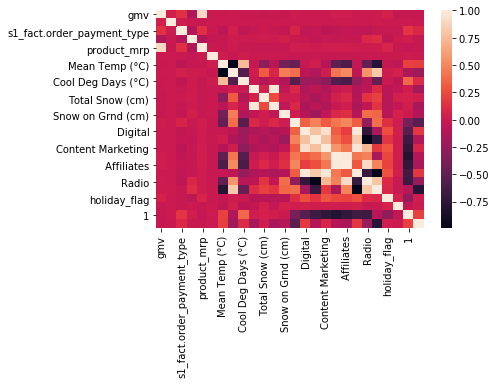

In [96]:
sns.heatmap(corre)

In [0]:
# creating subgroups from master file
camera_master = df_consum_cli_media_grp_nps[df_consum_cli_media_grp_nps["product_analytic_category"].isin(["CameraAccessory",'Camera'])]
home_master = df_consum_cli_media_grp_nps[df_consum_cli_media_grp_nps["product_analytic_category"].isin(["EntertainmentSmall"])]
gaming_master = df_consum_cli_media_grp_nps[df_consum_cli_media_grp_nps["product_analytic_category"].isin(["GameCDDVD",'GamingHardware'])]


In [45]:
df_consum_cli_media_grp_nps["product_analytic_category"].unique()

array(['CameraAccessory', 'GamingHardware', 'EntertainmentSmall',
       'GameCDDVD', 'Camera'], dtype=object)

In [0]:
from sklearn import preprocessing as prep
le = prep.LabelEncoder()

In [47]:
camera_master["product_analytic_sub_category"] = le.fit_transform(camera_master["product_analytic_sub_category"])
camera_master["product_analytic_vertical"] = le.fit_transform(camera_master["product_analytic_vertical"])
home_master["product_analytic_sub_category"] = le.fit_transform(home_master["product_analytic_sub_category"])
home_master["product_analytic_vertical"] = le.fit_transform(home_master["product_analytic_vertical"])
gaming_master["product_analytic_sub_category"] = le.fit_transform(gaming_master["product_analytic_sub_category"])
gaming_master["product_analytic_vertical"] = le.fit_transform(gaming_master["product_analytic_vertical"])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [0]:
#grouping subgroup files
camera_master_grp = pd.DataFrame(camera_master.groupby(["year","weeknum"]).agg({"gmv":"mean","units":"mean",
                                                                                               "s1_fact.order_payment_type":"mean",
                                                                                               "sla":"mean",
                                                                                               "product_analytic_sub_category":"mean",
                                                                                               "product_analytic_vertical":"mean",
                                                                                               "product_mrp":"mean","product_procurement_sla":"mean",
                                                                                               "Mean Temp (°C)":"mean","Heat Deg Days (°C)":"mean","Cool Deg Days (°C)":"mean",
                                                                                               "Total Rain (mm)":"mean","Total Snow (cm)":"mean","Total Precip (mm)":"mean",
                                                                                               "Snow on Grnd (cm)":"mean","TV":"mean","Digital":"mean",
                                                                                               "Sponsorship":"mean","Content Marketing":"mean",
                                                                                               "Online marketing":"mean"," Affiliates":"mean","SEM":"mean",
                                                                                               "Radio":"mean","Other":"mean","holiday_flag":"mean","payday_flag":"mean",
                                                                                               1:"mean",2:"mean"}))
home_master_grp = pd.DataFrame(home_master.groupby(["year","weeknum"]).agg({"gmv":"mean","units":"mean",
                                                                                               "s1_fact.order_payment_type":"mean",
                                                                                               "sla":"mean",
                                                                                               "product_analytic_sub_category":"mean",
                                                                                               "product_analytic_vertical":"mean",
                                                                                               "product_mrp":"mean","product_procurement_sla":"mean",
                                                                                               "Mean Temp (°C)":"mean","Heat Deg Days (°C)":"mean","Cool Deg Days (°C)":"mean",
                                                                                               "Total Rain (mm)":"mean","Total Snow (cm)":"mean","Total Precip (mm)":"mean",
                                                                                               "Snow on Grnd (cm)":"mean","TV":"mean","Digital":"mean",
                                                                                               "Sponsorship":"mean","Content Marketing":"mean",
                                                                                               "Online marketing":"mean"," Affiliates":"mean","SEM":"mean",
                                                                                               "Radio":"mean","Other":"mean","holiday_flag":"mean","payday_flag":"mean",
                                                                                               1:"mean",2:"mean"}))
gaming_master_grp = pd.DataFrame(gaming_master.groupby(["year","weeknum"]).agg({"gmv":"mean","units":"mean",
                                                                                               "s1_fact.order_payment_type":"mean",
                                                                                               "sla":"mean",
                                                                                               "product_analytic_sub_category":"mean",
                                                                                               "product_analytic_vertical":"mean",
                                                                                               "product_mrp":"mean","product_procurement_sla":"mean",
                                                                                               "Mean Temp (°C)":"mean","Heat Deg Days (°C)":"mean","Cool Deg Days (°C)":"mean",
                                                                                               "Total Rain (mm)":"mean","Total Snow (cm)":"mean","Total Precip (mm)":"mean",
                                                                                               "Snow on Grnd (cm)":"mean","TV":"mean","Digital":"mean",
                                                                                               "Sponsorship":"mean","Content Marketing":"mean",
                                                                                               "Online marketing":"mean"," Affiliates":"mean","SEM":"mean",
                                                                                               "Radio":"mean","Other":"mean","holiday_flag":"mean","payday_flag":"mean",
                                                                                               1:"mean",2:"mean"}))

In [49]:
camera_master_grp.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 57 entries, (2015, 26) to (2016, 53)
Data columns (total 28 columns):
gmv                              57 non-null float64
units                            57 non-null float64
s1_fact.order_payment_type       57 non-null float64
sla                              57 non-null float64
product_analytic_sub_category    57 non-null float64
product_analytic_vertical        57 non-null float64
product_mrp                      57 non-null float64
product_procurement_sla          57 non-null float64
Mean Temp (°C)                   54 non-null float64
Heat Deg Days (°C)               54 non-null float64
Cool Deg Days (°C)               54 non-null float64
Total Rain (mm)                  55 non-null float64
Total Snow (cm)                  55 non-null float64
Total Precip (mm)                55 non-null float64
Snow on Grnd (cm)                55 non-null float64
TV                               53 non-null float64
Digital                         

In [50]:
camera_master_grp.head()

gmv     units  ...          1       2
year weeknum                         ...                   
2015 26        350.000000  1.000000  ...        NaN     NaN
     27       3011.857143  1.023810  ...  54.599588  1177.0
     28       3403.733450  1.038317  ...  54.599588  1177.0
     29       4351.347807  1.032677  ...  54.599588  1177.0
     30       4073.000687  1.038453  ...  54.599588  1177.0

[5 rows x 28 columns]

In [0]:
camera_master_grp["SEM"].fillna(value = camera_master_grp["SEM"].mode(),inplace = True)
camera_master_grp["Radio"].fillna(value = camera_master_grp["Radio"].mean(),inplace = True)
camera_master_grp["Other"].fillna(value = camera_master_grp["Other"].mean(),inplace = True)
camera_master_grp.dropna(inplace = True)

In [52]:
camera_master_grp.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 50 entries, (2015, 27) to (2016, 26)
Data columns (total 28 columns):
gmv                              50 non-null float64
units                            50 non-null float64
s1_fact.order_payment_type       50 non-null float64
sla                              50 non-null float64
product_analytic_sub_category    50 non-null float64
product_analytic_vertical        50 non-null float64
product_mrp                      50 non-null float64
product_procurement_sla          50 non-null float64
Mean Temp (°C)                   50 non-null float64
Heat Deg Days (°C)               50 non-null float64
Cool Deg Days (°C)               50 non-null float64
Total Rain (mm)                  50 non-null float64
Total Snow (cm)                  50 non-null float64
Total Precip (mm)                50 non-null float64
Snow on Grnd (cm)                50 non-null float64
TV                               50 non-null float64
Digital                         

In [84]:
cammera_cor = camera_master_grp.corr()
cammera_cor

,gmv,units,s1_fact.order_payment_type,sla,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,holiday_flag,payday_flag,1,2
gmv,1.000000,-0.151324,0.056071,-0.288686,-0.948340,0.652393,0.986272,-0.262509,-0.236051,0.244871,-0.148833,-0.034175,-0.065135,-0.045906,0.025009,0.269170,0.023524,0.097211,0.100386,0.342901,0.362037,0.083289,0.036709,0.068639,0.535811,-0.101478,-0.300827,-0.103586
units,-0.151324,1.000000,-0.346127,-0.173879,0.121716,-0.297312,-0.197124,-0.074963,0.175372,-0.147920,0.216099,-0.029486,0.026841,-0.021916,-0.025628,-0.085200,0.078171,0.127854,0.004601,-0.129164,-0.130426,0.038343,0.122286,0.164584,-0.171514,0.002634,-0.168826,-0.119896
s1_fact.order_payment_type,0.056071,-0.346127,1.000000,-0.253676,-0.016092,0.168238,0.061869,-0.141443,0.094670,-0.116481,0.002984,-0.164380,-0.120165,-0.179659,-0.143968,-0.054718,-0.139230,-0.230422,-0.290002,-0.354981,-0.320749,-0.188795,-0.071796,-0.023723,0.072190,-0.078414,0.548145,0.260157
sla,-0.288686,-0.173879,-0.253676,1.000000,0.223611,-0.389133,-0.278350,0.609254,0.004025,0.060093,0.201975,0.039376,0.055242,0.048673,0.098047,-0.055187,0.030956,-0.053066,0.048458,-0.100114,-0.108686,0.001781,0.138638,0.158577,-0.046276,0.006172,0.204400,-0.049252
product_analytic_sub_category,-0.948340,0.121716,-0.016092,0.223611,1.000000,-0.590470,-0.957298,0.121871,0.253271,-0.243214,0.220267,0.040059,0.055494,0.049366,-0.035997,-0.321238,-0.245082,-0.222082,-0.299425,-0.377829,-0.379241,-0.295023,-0.104796,-0.142476,-0.563287,0.130696,0.371594,0.125183
product_analytic_vertical,0.652393,-0.297312,0.168238,-0.389133,-0.590470,1.000000,0.618175,-0.639405,-0.123519,0.117817,-0.109899,-0.030309,0.043497,-0.019139,0.063809,0.067870,-0.004630,0.013520,0.090787,0.209922,0.211358,0.040873,0.088146,0.000748,0.381443,-0.026758,-0.145686,0.033564
product_mrp,0.986272,-0.197124,0.061869,-0.278350,-0.957298,0.618175,1.000000,-0.195732,-0.307974,0.302815,-0.245904,-0.006344,-0.049879,-0.016572,0.043731,0.338343,0.062153,0.119442,0.146046,0.399096,0.420750,0.121710,0.032502,0.092608,0.543098,-0.094831,-0.328846,-0.131618
product_procurement_sla,-0.262509,-0.074963,-0.141443,0.609254,0.121871,-0.639405,-0.195732,1.000000,0.016483,-0.016272,0.012959,-0.041769,-0.076398,-0.055423,-0.035390,0.049596,0.195839,0.144702,0.187506,-0.030847,-0.052118,0.186155,0.213780,0.264412,0.006777,-0.081038,-0.002603,-0.173810
Mean Temp (°C),-0.236051,0.175372,0.094670,0.004025,0.253271,-0.123519,-0.307974,0.016483,1.000000,-0.981467,0.803975,-0.180052,-0.479766,-0.270959,-0.413985,-0.510313,0.060129,0.072503,-0.133653,-0.642075,-0.705715,-0.004524,-0.237970,-0.343215,-0.049889,-0.089243,0.365469,0.275028
Heat Deg Days (°C),0.244871,-0.147920,-0.116481,0.060093,-0.243214,0.117817,0.302815,-0.016272,-0.981467,1.000000,-0.675121,0.187691,0.519973,0.286684,0.457824,0.438111,-0.133109,-0.154042,0.059495,0.565488,0.633201,-0.079425,0.293378,0.391980,0.052980,0.091522,-0.287307,-0.295535


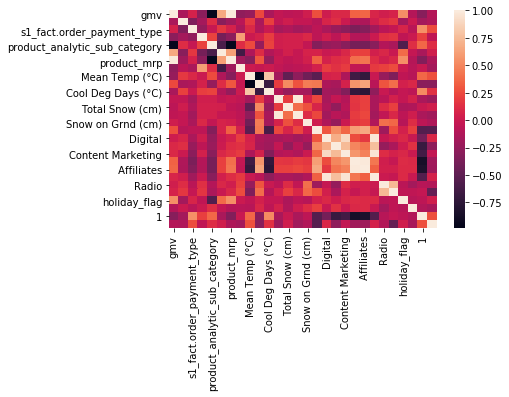

In [92]:
sns.heatmap(cammera_cor)

In [53]:
#Linear Regression Model For Camera group
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
np.random.seed(0)
df_train, df_test = train_test_split(camera_master_grp, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)
y_train_camera = df_train['gmv']
X_train_camera = df_train.drop(columns = "gmv")
# Add a constant
X_train_lm_camera = sm.add_constant(X_train_camera)
# Create a first fitted model
lr = sm.OLS(y_train_camera, X_train_lm_camera).fit()
lr.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     68.89
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.46e-07
Time:                        15:55:21   Log-Likelihood:                -215.57
No. Observations:                  35   AIC:                             483.1
Df Residuals:                       9   BIC:                             523.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -26.0574    218.765     -0.119      0.908    -520.938     468.823
units                          4479.8780   2.21e+04      0.203      0.844   -4.55e+04    5.44e+04
s1_fact.order_payment_type    -1202.4708   2760.479     -0.436      0.673   -7447.109    5042.167
sla                              32.0178    319.474      0.100      0.922    -690.683     754.718
product_analytic_sub_category -5042.1237   4300.770     -1.172      0.271   -1.48e+04    4686.894
product_analytic_vertical      -168.7049    198.986     -0.848      0.419    -618.843     281.433
product_mrp                       0.4848      0.114      4.242      0.002       0.226       0.743
product_procurement_sla       -1266.1906    667.765     -1.896      0.090   -2776.781     244.400
Mean Temp (°C)                 -141.6579   1316.432     -0.108      0.917   -3119.633    2836.317
Heat Deg Days (°C)             -140.8264   1314.819     -0.107      0.917   -3115.153    2833.500
Cool Deg Days (°C)              186.5494   1307.975      0.143      0.890   -2772.295    3145.394
Total Rain (mm)                 -39.5923     48.439     -0.817      0.435    -149.169      69.985
Total Snow (cm)                  68.4421     91.786      0.746      0.475    -139.192     276.076
Total Precip (mm)                28.8498     44.696      0.645      0.535     -72.260     129.959
Snow on Grnd (cm)                -5.0839     30.833     -0.165      0.873     -74.833      64.665
TV                              464.5540    562.109      0.826      0.430    -807.024    1736.132
Digital                         730.7491   1814.101      0.403      0.696   -3373.033    4834.531
Sponsorship                      12.3594     20.190      0.612      0.556     -33.314      58.032
Content Marketing             -2445.5117   2917.244     -0.838      0.424   -9044.775    4153.752
Online marketing               1041.2705   1472.387      0.707      0.497   -2289.501    4372.042
 Affiliates                   -3251.3252   4553.616     -0.714      0.493   -1.36e+04    7049.671
SEM                            -229.2405    702.427     -0.326      0.752   -1818.241    1359.760
Radio                          2492.6903   3544.548      0.703      0.500   -5525.635    1.05e+04
Other                           -58.6954    181.025     -0.324      0.753    -468.202     350.811
holiday_flag                     78.7407    281.085      0.280      0.786    -557.118     714.599
payday_flag                     660.5776   1062.971      0.621      0.550   -1744.029    3065.184
1                               -20.7532    343.057     -0.060      0.953    -796.802     755.295
2                                 6.7408      7.652      0.881      0.401     -10.569      24.050
=============================================

In [54]:
#Finding Vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_camera.columns
vif['VIF'] = [variance_inflation_factor(X_train_camera.values, i) for i in range(X_train_camera.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
10,Total Rain (mm),inf
12,Total Precip (mm),inf
11,Total Snow (cm),inf
7,Mean Temp (°C),262136.10
8,Heat Deg Days (°C),143755.81
18,Online marketing,76739.36
19,Affiliates,64697.64
15,Digital,27413.68
20,SEM,23767.84
9,Cool Deg Days (°C),8574.92


In [55]:
#Creating new model with reduced attributes
X_train_camera_new = df_train.filter(items = ["product_mrp",'product_analytic_sub_category','product_analytic_vertical',
                                              'product_procurement_sla','sla','holiday_flag','units','payday_flag'])
# Add a constant
X_train_lm_camera_new = sm.add_constant(X_train_camera_new)
# Create a first fitted model
lr_new = sm.OLS(y_train_camera, X_train_lm_camera_new).fit()
lr_new.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     233.2
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.36e-22
Time:                        15:55:21   Log-Likelihood:                -232.58
No. Observations:                  35   AIC:                             483.2
Df Residuals:                      26   BIC:                             497.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1.905e+04   8768.169     -2.173      0.039   -3.71e+04   -1027.375
product_mrp                       0.6054      0.057     10.543      0.000       0.487       0.723
product_analytic_sub_category   798.5240   2126.732      0.375      0.710   -3573.036    5170.084
product_analytic_vertical       -37.2027     69.279     -0.537      0.596    -179.607     105.202
product_procurement_sla        -422.0056    324.446     -1.301      0.205   -1088.914     244.903
sla                             -82.5798    118.629     -0.696      0.493    -326.424     161.265
holiday_flag                     74.1583    158.447      0.468      0.644    -251.533     399.850
units                          2.047e+04   7592.133      2.696      0.012    4859.950    3.61e+04
payday_flag                     388.9751    615.313      0.632      0.533    -875.818    1653.769
==============================================================================
Omnibus:                        2.822   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                2.330
Skew:                           0.628   Prob(JB):                        0.312
Kurtosis:                       2.852   Cond. No.                     2.86e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
#Testing linear regression model
X_test_camera = df_test.filter(items = ["product_mrp",'product_analytic_sub_category','product_analytic_vertical',
                                              'product_procurement_sla','sla','holiday_flag','units','payday_flag'])
y_test_camera = df_test['gmv']
# Adding constant variable to test dataframe
X_test_r_camera = sm.add_constant(X_test_camera)
y_pred_camera = lr_new.predict(X_test_r_camera)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [57]:
#Evaluating Model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
np.sqrt(mean_squared_error(y_test_camera, y_pred_camera))
r2_squared = r2_score(y_test_camera, y_pred_camera)
r2_squared

0.9425249549673839

In [0]:
#Creating k-nearest neighbour model
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
rr = model.fit(X_train_camera,y_train_camera)
y_train_camera_pred_k = rr.predict(X_train_camera)


In [59]:

np.sqrt(mean_squared_error(y_train_camera, y_train_camera_pred_k))
r2_squared = r2_score(y_train_camera, y_train_camera_pred_k)
r2_squared

0.9683444602832326

In [0]:
#Testing k-nearest neighbour model
y_test_camera_pred_k = rr.predict(df_test.drop(columns = 'gmv'))

In [61]:
np.sqrt(mean_squared_error(y_test_camera, y_test_camera_pred_k))
r2_squared = r2_score(y_test_camera, y_test_camera_pred_k)
r2_squared


0.7793997340563412

In [0]:
home_master_grp["SEM"].fillna(value = home_master_grp["SEM"].mode(),inplace = True)
home_master_grp["Radio"].fillna(value = home_master_grp["Radio"].mean(),inplace = True)
home_master_grp["Other"].fillna(value = home_master_grp["Other"].mean(),inplace = True)
home_master_grp.dropna(inplace = True)


In [88]:
home_corr = home_master_grp.corr()
home_corr

,gmv,units,s1_fact.order_payment_type,sla,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,holiday_flag,payday_flag,1,2
gmv,1.000000,0.253709,0.265404,-0.333058,-0.660138,-0.352230,0.883651,0.316854,0.245560,-0.264190,0.131476,-0.083601,-0.199583,-0.122705,-0.075797,-0.089515,-0.012230,-0.025387,-0.104390,-0.238977,-0.241240,-0.053394,-0.051382,-0.006322,-0.023051,-0.054631,0.160335,-0.007112
units,0.253709,1.000000,0.135191,-0.279351,0.101354,0.185280,0.218578,0.071370,-0.058251,-0.022601,-0.271680,-0.079052,-0.023327,-0.077702,-0.050874,0.046425,0.157708,0.128195,0.075612,0.025959,0.025665,0.147850,0.009102,0.044680,-0.063568,0.167737,-0.208147,-0.061864
s1_fact.order_payment_type,0.265404,0.135191,1.000000,-0.417686,0.007208,-0.078759,0.052556,0.094107,0.149684,-0.149326,0.113180,-0.180691,-0.128418,-0.195007,-0.129125,-0.118106,-0.183887,-0.285531,-0.332281,-0.401098,-0.370390,-0.243085,-0.079305,-0.039095,0.106089,-0.083132,0.574341,0.279477
sla,-0.333058,-0.279351,-0.417686,1.000000,0.125908,0.162988,-0.226870,0.201993,-0.369387,0.371505,-0.270840,0.202580,0.163902,0.223248,0.168032,0.281680,0.131513,0.157700,0.219787,0.383371,0.398695,0.167771,0.116155,0.129239,-0.024320,0.085969,-0.415919,-0.159451
product_analytic_sub_category,-0.660138,0.101354,0.007208,0.125908,1.000000,0.857856,-0.493758,-0.110217,0.010675,-0.025880,-0.034886,-0.002712,-0.008919,-0.004547,-0.024333,0.009004,-0.044969,0.034025,-0.033984,0.092993,0.096441,-0.016758,-0.112862,-0.178936,0.061695,0.026566,-0.133553,0.085663
product_analytic_vertical,-0.352230,0.185280,-0.078759,0.162988,0.857856,1.000000,-0.103231,0.204326,-0.105692,0.064266,-0.196039,0.060207,0.009902,0.057357,0.013015,0.151480,-0.108740,0.078450,-0.052351,0.256628,0.276399,-0.061028,-0.215550,-0.245583,-0.069024,0.039650,-0.302277,0.026891
product_mrp,0.883651,0.218578,0.052556,-0.226870,-0.493758,-0.103231,1.000000,0.437803,0.140669,-0.164610,0.037892,-0.025715,-0.189525,-0.067436,-0.047246,0.038614,-0.023226,0.048461,-0.051966,-0.046774,-0.047777,-0.033327,-0.112989,-0.053116,-0.040392,-0.052708,-0.027665,-0.124038
product_procurement_sla,0.316854,0.071370,0.094107,0.201993,-0.110217,0.204326,0.437803,1.000000,-0.270605,0.260084,-0.232460,0.175627,0.097077,0.183114,0.070910,0.149941,-0.275573,-0.169492,-0.225184,0.054880,0.093536,-0.289438,-0.109446,0.056298,-0.202648,-0.120971,0.035861,-0.244536
Mean Temp (°C),0.245560,-0.058251,0.149684,-0.369387,0.010675,-0.105692,0.140669,-0.270605,1.000000,-0.978226,0.810793,-0.208408,-0.466724,-0.298750,-0.401070,-0.548894,0.043049,-0.001071,-0.166797,-0.674093,-0.729090,-0.038297,-0.221735,-0.324459,0.026280,-0.128571,0.441626,0.302016
Heat Deg Days (°C),-0.264190,-0.022601,-0.149326,0.371505,-0.025880,0.064266,-0.164610,0.260084,-0.978226,1.000000,-0.671657,0.217425,0.509213,0.316842,0.447722,0.470255,-0.121618,-0.094346,0.086620,0.588838,0.647681,-0.053248,0.281972,0.379636,0.006342,0.103616,-0.348351,-0.320134


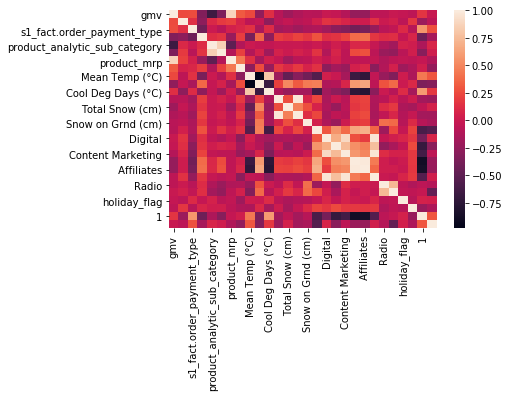

In [89]:
sns.heatmap(home_corr)

In [63]:
#creating linear regression model for home_entertainment
df_train, df_test = train_test_split(home_master_grp, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)
y_train_home = df_train['gmv']
X_train_home = df_train.drop(columns = "gmv")
# Add a constant
X_train_lm_home = sm.add_constant(X_train_home)
# Create a first fitted model
lr = sm.OLS(y_train_home, X_train_lm_home).fit()
lr.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     16.62
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.98e-05
Time:                        15:55:21   Log-Likelihood:                -189.01
No. Observations:                  36   AIC:                             430.0
Df Residuals:                      10   BIC:                             471.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            58.9845    124.837      0.472      0.647    -219.169     337.138
units                         -9143.7893    1.5e+04     -0.609      0.556   -4.26e+04    2.43e+04
s1_fact.order_payment_type     -756.1989    552.324     -1.369      0.201   -1986.854     474.456
sla                             -98.1792     83.841     -1.171      0.269    -284.990      88.631
product_analytic_sub_category  -656.8047    687.515     -0.955      0.362   -2188.683     875.074
product_analytic_vertical       135.5952    193.899      0.699      0.500    -296.439     567.629
product_mrp                       0.3281      0.218      1.505      0.163      -0.158       0.814
product_procurement_sla          20.9559    118.240      0.177      0.863    -242.499     284.411
Mean Temp (°C)                  348.2313    751.677      0.463      0.653   -1326.609    2023.072
Heat Deg Days (°C)              345.0850    750.051      0.460      0.655   -1326.134    2016.304
Cool Deg Days (°C)             -368.4055    745.499     -0.494      0.632   -2029.481    1292.670
Total Rain (mm)                  20.3916     17.560      1.161      0.273     -18.735      59.518
Total Snow (cm)                 -32.5818     32.030     -1.017      0.333    -103.950      38.786
Total Precip (mm)               -12.1902     15.343     -0.795      0.445     -46.376      21.995
Snow on Grnd (cm)                 5.0781     13.880      0.366      0.722     -25.848      36.005
TV                              -48.3360    234.779     -0.206      0.841    -571.456     474.784
Digital                        -670.9751    809.015     -0.829      0.426   -2473.574    1131.623
Sponsorship                       2.6950      5.795      0.465      0.652     -10.217      15.607
Content Marketing               442.0418   1625.490      0.272      0.791   -3179.775    4063.859
Online marketing               -321.2776    707.753     -0.454      0.660   -1898.250    1255.695
 Affiliates                     928.3938   2130.587      0.436      0.672   -3818.850    5675.637
SEM                             285.7716    279.900      1.021      0.331    -337.884     909.427
Radio                          -674.2097   1591.930     -0.424      0.681   -4221.251    2872.831
Other                            56.3417     62.796      0.897      0.391     -83.576     196.259
holiday_flag                    -78.5829    130.968     -0.600      0.562    -370.398     213.232
payday_flag                      27.0435    251.315      0.108      0.916    -532.921     587.008
1                               109.9860     78.308      1.405      0.190     -64.494     284.466
2                                 0.7932      2.411      0.329      0.749      -4.579       6.166
=============================================

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_home.columns
vif['VIF'] = [variance_inflation_factor(X_train_home.values, i) for i in range(X_train_home.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
10,Total Rain (mm),inf
12,Total Precip (mm),inf
11,Total Snow (cm),inf
7,Mean Temp (°C),660337.10
8,Heat Deg Days (°C),258498.73
18,Online marketing,149907.37
19,Affiliates,121627.43
15,Digital,36792.33
9,Cool Deg Days (°C),26428.93
20,SEM,25500.06


In [65]:
X_train_home_new = df_train.filter(items = ["product_mrp",'units','sla','holiday_flag','Snow on Grnd (cm)',
                                              'product_procurement_sla','payday_flag'])
# Add a constant
X_train_lm_home_new = sm.add_constant(X_train_home_new)
# Create a first fitted model
lr_new = sm.OLS(y_train_home, X_train_lm_home_new).fit()
lr_new.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     20.60
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.77e-09
Time:                        15:55:21   Log-Likelihood:                -223.82
No. Observations:                  36   AIC:                             463.6
Df Residuals:                      28   BIC:                             476.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.047e+04   6945.850      2.947      0.006    6239.945    3.47e+04
product_mrp                 0.5788      0.069      8.369      0.000       0.437       0.720
units                   -1.942e+04   6790.945     -2.860      0.008   -3.33e+04   -5508.598
sla                       -50.4642     49.149     -1.027      0.313    -151.142      50.213
holiday_flag             -188.3275    111.240     -1.693      0.102    -416.193      39.538
Snow on Grnd (cm)          -4.0446     13.768     -0.294      0.771     -32.246      24.157
product_procurement_sla  -218.7237    119.148     -1.836      0.077    -462.787      25.339
payday_flag              -175.7070    313.969     -0.560      0.580    -818.843     467.429
==============================================================================
Omnibus:                       13.257   Durbin-Watson:                   1.338
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               25.187
Skew:                          -0.738   Prob(JB):                     3.39e-06
Kurtosis:                       6.823   Cond. No.                     1.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
X_test_home = df_test.filter(items = ["product_mrp",'units','sla','holiday_flag','Snow on Grnd (cm)',
                                              'product_procurement_sla','payday_flag'])
y_test_home = df_test['gmv']
# Adding constant variable to test dataframe
X_test_r_home = sm.add_constant(X_test_home)
y_pred_home = lr_new.predict(X_test_r_home)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [67]:
np.sqrt(mean_squared_error(y_test_home, y_pred_home))
r2_squared = r2_score(y_test_home, y_pred_home)
r2_squared

-1.833556750594715

In [0]:
#creating k-nearest neighbour model for home entertainment
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
rr = model.fit(X_train_home,y_train_home)
y_train_home_pred_k = rr.predict(X_train_home)


In [69]:
np.sqrt(mean_squared_error(y_train_home, y_train_home_pred_k))
r2_squared = r2_score(y_train_home, y_train_home_pred_k)
r2_squared

0.8004475825623534

In [0]:
y_test_home_pred_k = rr.predict(df_test.drop(columns = 'gmv'))

In [71]:
np.sqrt(mean_squared_error(y_test_home, y_test_home_pred_k))
r2_squared = r2_score(y_test_home, y_test_home_pred_k)
r2_squared

0.6870449047547567

In [0]:
gaming_master_grp["SEM"].fillna(value = gaming_master_grp["SEM"].mode(),inplace = True)
gaming_master_grp["Radio"].fillna(value = gaming_master_grp["Radio"].mean(),inplace = True)
gaming_master_grp["Other"].fillna(value = gaming_master_grp["Other"].mean(),inplace = True)

gaming_master_grp.dropna(inplace = True)

In [97]:
gaming_cor = gaming_master_grp.corr()
gaming_cor

,gmv,units,s1_fact.order_payment_type,sla,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,holiday_flag,payday_flag,1,2
gmv,1.000000,0.446795,0.455468,-0.304219,-0.246477,0.393238,0.636433,0.254119,-0.175189,0.124076,-0.289888,-0.066302,-0.118279,-0.084976,-0.103523,0.213287,-0.197568,0.062943,-0.142043,0.271538,0.300413,-0.108983,-0.128590,-0.173428,-0.051777,-0.129944,-0.320627,-0.121876
units,0.446795,1.000000,-0.029938,0.072720,-0.036353,0.269872,0.395981,0.126904,-0.174707,0.173517,-0.134130,-0.010661,-0.057184,-0.021262,0.010164,0.291138,0.158270,0.324279,0.174072,0.274966,0.278350,0.196540,0.067562,0.154848,0.055275,-0.017681,-0.454225,-0.375616
s1_fact.order_payment_type,0.455468,-0.029938,1.000000,-0.342512,-0.093866,0.072461,0.275057,-0.093556,-0.092067,0.041917,-0.224836,-0.091349,-0.060935,-0.096763,-0.097855,0.118103,-0.136983,-0.106922,-0.233153,-0.085804,-0.034519,-0.146569,-0.073778,-0.041513,-0.186538,0.084879,0.185379,0.209815
sla,-0.304219,0.072720,-0.342512,1.000000,0.648817,-0.503847,-0.269918,0.073372,-0.166012,0.206693,0.002696,0.213020,0.084920,0.214262,0.088997,0.173790,0.101410,0.161624,0.185717,0.250026,0.251569,0.135495,0.101160,0.070442,0.029023,0.085151,-0.256671,-0.095375
product_analytic_sub_category,-0.246477,-0.036353,-0.093866,0.648817,1.000000,-0.864094,-0.120744,-0.163609,-0.102752,0.155856,0.088594,0.205763,0.052936,0.201170,0.120089,-0.081273,-0.073201,-0.104809,-0.013274,0.016420,0.014462,-0.064852,0.166373,0.095668,0.268600,-0.027387,0.064459,-0.047907
product_analytic_vertical,0.393238,0.269872,0.072461,-0.503847,-0.864094,1.000000,0.313949,0.143351,-0.201943,0.135387,-0.357931,-0.224467,0.029649,-0.202056,0.015683,0.206393,0.066481,0.155820,0.119865,0.304149,0.313272,0.113167,-0.052000,-0.055238,-0.165461,0.066819,-0.344063,-0.022645
product_mrp,0.636433,0.395981,0.275057,-0.269918,-0.120744,0.313949,1.000000,0.060246,-0.069924,0.044221,-0.132210,-0.133169,-0.122345,-0.147735,-0.041701,0.088691,0.092672,0.140357,0.122130,0.181713,0.168878,0.150167,0.071741,-0.030053,0.174933,-0.105516,-0.270226,-0.089263
product_procurement_sla,0.254119,0.126904,-0.093556,0.073372,-0.163609,0.143351,0.060246,1.000000,0.287437,-0.259030,0.303004,-0.263701,-0.104502,-0.265114,-0.123880,-0.114792,-0.100386,0.167928,-0.084437,-0.013478,-0.010587,-0.071541,0.008076,-0.085669,-0.171391,-0.029198,-0.237789,0.077462
Mean Temp (°C),-0.175189,-0.174707,-0.092067,-0.166012,-0.102752,-0.201943,-0.069924,0.287437,1.000000,-0.981574,0.803882,-0.112378,-0.482618,-0.200204,-0.410901,-0.520612,0.059476,0.046288,-0.139947,-0.645685,-0.704911,-0.010679,-0.228548,-0.334592,-0.051320,-0.101687,0.383708,0.285857
Heat Deg Days (°C),0.124076,0.173517,0.041917,0.206693,0.155856,0.135387,0.044221,-0.259030,-0.981574,1.000000,-0.675418,0.139661,0.522795,0.233480,0.452775,0.449433,-0.130364,-0.125041,0.066823,0.570712,0.633921,-0.071340,0.282624,0.382668,0.056689,0.090425,-0.312562,-0.306183


In [73]:
#creating linear regression model for gaming
df_train, df_test = train_test_split(gaming_master_grp, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)
y_train_gaming = df_train['gmv']
X_train_gaming = df_train.drop(columns = "gmv")
# Add a constant
X_train_lm_gaming = sm.add_constant(X_train_gaming)
# Create a first fitted model
lr = sm.OLS(y_train_gaming, X_train_lm_gaming).fit()
lr.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     7.260
Date:                Mon, 02 Mar 2020   Prob (F-statistic):            0.00202
Time:                        15:55:22   Log-Likelihood:                -202.37
No. Observations:                  35   AIC:                             456.7
Df Residuals:                       9   BIC:                             497.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.8211    135.206     -0.021      0.984    -308.679     303.037
units                          1.015e+04   5555.921      1.827      0.101   -2415.037    2.27e+04
s1_fact.order_payment_type     1274.6427   1014.303      1.257      0.241   -1019.869    3569.155
sla                             123.0744    240.573      0.512      0.621    -421.139     667.287
product_analytic_sub_category    80.1703   1879.680      0.043      0.967   -4171.962    4332.303
product_analytic_vertical        11.2129    181.596      0.062      0.952    -399.585     422.011
product_mrp                       0.0758      0.119      0.638      0.539      -0.193       0.345
product_procurement_sla          14.3014     14.788      0.967      0.359     -19.151      47.754
Mean Temp (°C)                  -12.3461    801.790     -0.015      0.988   -1826.121    1801.429
Heat Deg Days (°C)              -18.9835    801.212     -0.024      0.982   -1831.451    1793.484
Cool Deg Days (°C)               19.4502    831.540      0.023      0.982   -1861.624    1900.524
Total Rain (mm)                  47.6107     32.711      1.455      0.180     -26.387     121.608
Total Snow (cm)                 -84.5808     62.554     -1.352      0.209    -226.088      56.926
Total Precip (mm)               -36.9702     31.544     -1.172      0.271    -108.327      34.386
Snow on Grnd (cm)                 1.2815     24.020      0.053      0.959     -53.055      55.618
TV                             -380.1662   1338.715     -0.284      0.783   -3408.550    2648.218
Digital                       -1081.7755   4365.989     -0.248      0.810    -1.1e+04    8794.778
Sponsorship                     -20.8535     14.622     -1.426      0.188     -53.932      12.225
Content Marketing              1448.6856   7701.544      0.188      0.855    -1.6e+04    1.89e+04
Online marketing               -955.9924   3815.274     -0.251      0.808   -9586.741    7674.756
 Affiliates                    3006.5021   1.16e+04      0.260      0.801   -2.32e+04    2.92e+04
SEM                             462.5988   1570.588      0.295      0.775   -3090.319    4015.517
Radio                         -2456.3424   8784.816     -0.280      0.786   -2.23e+04    1.74e+04
Other                            73.4676    366.291      0.201      0.845    -755.140     902.075
holiday_flag                    -14.9793    250.286     -0.060      0.954    -581.166     551.207
payday_flag                   -1482.5828    677.589     -2.188      0.056   -3015.396      50.230
1                               -35.5834    217.792     -0.163      0.874    -528.263     457.096
2                                -5.6591     13.075     -0.433      0.675     -35.237      23.919
=============================================

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_gaming.columns
vif['VIF'] = [variance_inflation_factor(X_train_gaming.values, i) for i in range(X_train_gaming.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
11,Total Snow (cm),inf
10,Total Rain (mm),inf
12,Total Precip (mm),inf
18,Online marketing,1278378.97
19,Affiliates,1025917.78
15,Digital,349487.10
20,SEM,262591.41
7,Mean Temp (°C),240619.83
8,Heat Deg Days (°C),90064.85
17,Content Marketing,89771.16


In [75]:
X_train_gaming_new = df_train.filter(items = ["product_mrp",'units','sla','holiday_flag','Snow on Grnd (cm)',
                                              'product_procurement_sla','payday_flag'])
# Add a constant
X_train_lm_gaming_new = sm.add_constant(X_train_gaming_new)
# Create a first fitted model
lr_new = sm.OLS(y_train_gaming, X_train_lm_gaming_new).fit()
lr_new.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     5.404
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           0.000587
Time:                        15:55:22   Log-Likelihood:                -240.45
No. Observations:                  35   AIC:                             496.9
Df Residuals:                      27   BIC:                             509.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1844.8924   4843.892     -0.381      0.706   -1.18e+04    8093.953
product_mrp                 0.2470      0.085      2.906      0.007       0.073       0.421
units                    4330.1498   4516.269      0.959      0.346   -4936.468    1.36e+04
sla                      -282.7963    141.331     -2.001      0.056    -572.783       7.191
holiday_flag             -434.8929    215.887     -2.014      0.054    -877.856       8.070
Snow on Grnd (cm)          -8.5842     26.001     -0.330      0.744     -61.934      44.765
product_procurement_sla     5.2062      6.294      0.827      0.415      -7.709      18.121
payday_flag              -800.2200    676.999     -1.182      0.248   -2189.307     588.867
==============================================================================
Omnibus:                        0.512   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.455
Skew:                          -0.255   Prob(JB):                        0.796
Kurtosis:                       2.773   Cond. No.                     4.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
X_test_gaming = df_test.filter(items = ["product_mrp",'units','sla','holiday_flag','Snow on Grnd (cm)',
                                              'product_procurement_sla','payday_flag'])
y_test_gaming = df_test['gmv']
# Adding constant variable to test dataframe
X_test_r_gaming = sm.add_constant(X_test_gaming)
y_pred_gaming = lr_new.predict(X_test_r_gaming)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [77]:
np.sqrt(mean_squared_error(y_test_gaming, y_pred_gaming))
r2_squared = r2_score(y_test_gaming, y_pred_gaming)
r2_squared

-0.14759722855934876

In [0]:
#creating k-nearest neighbour model for gaming
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
rr = model.fit(X_train_gaming,y_train_gaming)
y_train_gaming_pred_k = rr.predict(X_train_gaming)


In [79]:
np.sqrt(mean_squared_error(y_train_gaming, y_train_gaming_pred_k))
r2_squared = r2_score(y_train_gaming, y_train_gaming_pred_k)
r2_squared

0.9074245765480891

In [0]:
y_test_gaming_pred_k = rr.predict(df_test.drop(columns = 'gmv'))

In [81]:
np.sqrt(mean_squared_error(y_test_gaming, y_test_gaming_pred_k))
r2_squared = r2_score(y_test_gaming, y_test_gaming_pred_k)
r2_squared

0.6011451295152306